In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
![picture](https://drive.google.com/open?id=1DzQugTJyUpDSHWO7KL6SUCZsjEAqPm1i)



/bin/bash: -c: line 0: syntax error near unexpected token `https://drive.google.com/open?id=1DzQugTJyUpDSHWO7KL6SUCZsjEAqPm1i'
/bin/bash: -c: line 0: `[picture](https://drive.google.com/open?id=1DzQugTJyUpDSHWO7KL6SUCZsjEAqPm1i)'


In [ ]:
from google.colab import files

In [ ]:
import numpy as np
from imageio import imread
import cv2

import torch
import torch.nn
from torchvision.models.vgg import vgg19

import matplotlib.pyplot as plt
%matplotlib inline
!pip install sporco
!pip install flirimageextractor


     |████████████████████████████████| 4.5MB 37.8MB/s 
     |████████████████████████████████| 2.6MB 47.5MB/s 


In [ ]:
idx = 1
gray = imread('https://drive.google.com/uc?id=1gaH75Gk77tTso7G3aACRMCnfpVUT6ah0')


# resize image
img1 = cv2.resize(gray, (640,512))
ir = imread('https://drive.google.com/uc?id=1idzVDHFg_VxSsvSy5sCzP0kQc2khHwdQ')

from PIL import Image



image = cv2.imread('img1')
import cv2

import tensorflow as tf
offset_height=50
offset_width=70
target_height=400
target_width= 530
img1 = tf.image.crop_to_bounding_box(
    img1, offset_height, offset_width, target_height, target_width
)

tf.keras.preprocessing.image.array_to_img(
    img1, data_format=None, scale=True, dtype=None
)
plt.imshow(img1)



timeout: ignored

In [ ]:
imgUMat = np.float32(img1)
gray = cv2.cvtColor(np.float32(imgUMat), cv2.COLOR_RGB2GRAY)
cv2.waitKey(1000)
gray = cv2.resize(gray, (640,512))

In [ ]:
%cd gdrive/MyDrive/Colab Notebooks



[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks'
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:

import sys
sys.path.append('./')
import vgg

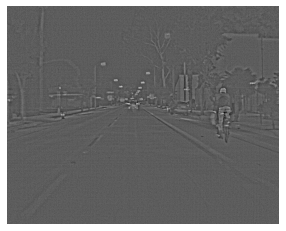

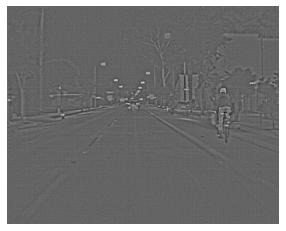

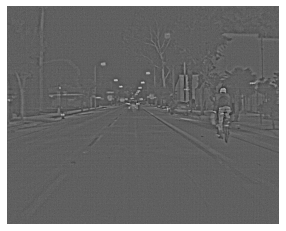

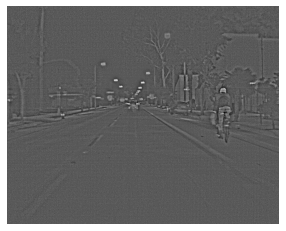

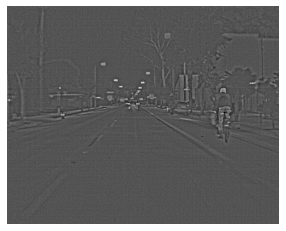

In [ ]:
from vgg import *

plt.imshow(gray)
plt.imshow(ir)

npad = 16
lda = 5
graylow, grayhigh = lowpass(gray.astype(np.float32)/255, lda, npad)
irlow, irhigh = lowpass(ir.astype(np.float32)/255, lda, npad)

grayhigh3 = c3(grayhigh)
irhigh3 = c3(irhigh)

model = vgg19(True).cuda().eval()

gray_in = torch.from_numpy(grayhigh3).cuda()
ir_in = torch.from_numpy(irhigh3).cuda()
relus = [2, 7, 12, 21]
unit_relus = [1, 2, 4, 8]

relus_gray = get_activation(model, relus, gray_in)
relus_ir = get_activation(model, relus, ir_in)

gray_feats = [l1_features(out) for out in relus_gray]
ir_feats = [l1_features(out) for out in relus_ir]

saliencies = []
saliency_max = None
for idx in range(len(relus)):
    saliency_current = fusion_strategy(gray_feats[idx], ir_feats[idx], grayhigh, irhigh, unit_relus[idx])
    saliencies.append(saliency_current)
    
    if saliency_max is None:
        saliency_max = saliency_current
    else:
        saliency_max = np.maximum(saliency_max, saliency_current)
    
    plt.imshow(saliency_current, 'gray')
    plt.axis('off')
    plt.show()

plt.imshow(saliency_max, 'gray')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Fusion')

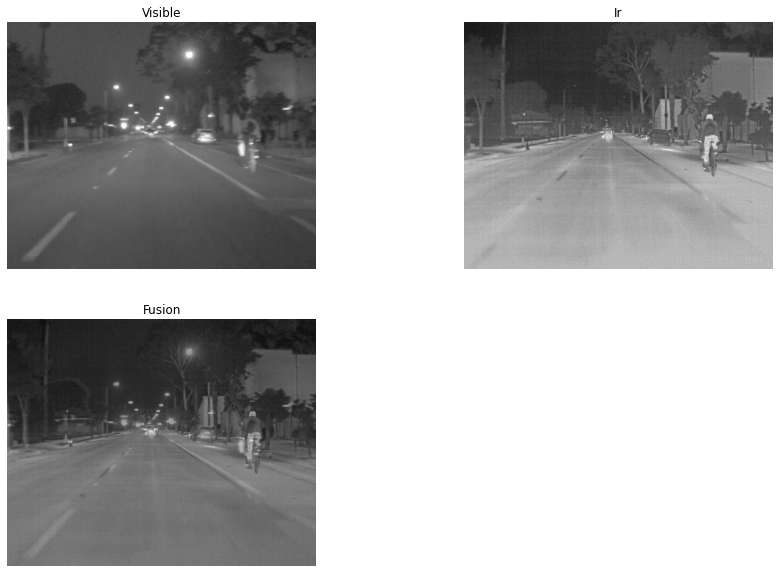

In [ ]:
low_fused = (graylow + irlow) / 2
high_fused = saliency_max

fusion = low_fused + high_fused

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(gray, 'gray')
plt.axis('off')
plt.title('Visible')

plt.subplot(2, 2, 2)
plt.imshow(ir, 'gray')
plt.axis('off')
plt.title('Ir')

plt.subplot(2, 2, 3)
plt.imshow(fusion, 'gray')
plt.axis('off')
plt.title('Fusion')